# Parcial 3

In [43]:
%matplotlib notebook
import numpy as np
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from IPython.display import HTML


### Punto 7

Se encuentra adjunto en la carpeta, como un pdf llamado: Parcial Metodods 2.pdf

### Punto 8

(f) : lA Neurona se activa en el timepo: 8.33 Y en la posicion: 0.58


<IPython.core.display.Javascript object>


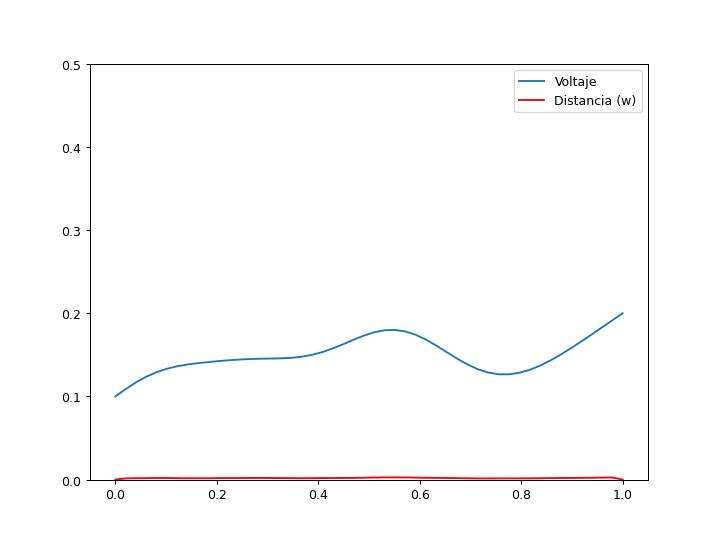

In [60]:

n = 50
Nt = 1000
potencial = np.zeros((Nt, n))
recuperacion = np.zeros((Nt, n))
L = 1.0
T = 10.0
dx = L / n
dt = T / Nt
umbral_u = 0.3
D = 0.01
alfa = 0.2
beta = 0.3
n = 50
Nt = 1000
potencial[0, :] = np.random.uniform(0, 0.3, n)
potencial[:, 0] = 0.1
potencial[:, -1] = 0.2

for i in range(Nt - 1):
    for j in range(1, n - 1):
        dudt = D * (potencial[i, j-1] - 2*potencial[i, j] + potencial[i, j+1]) / dx**2 - potencial[i, j] * (potencial[i, j] - alfa) * (1 - potencial[i, j]) + recuperacion[i, j]
        dwdt = epsilon * (potencial[i, j] - beta * recuperacion[i, j])
        potencial[i+1, j] = potencial[i, j] + dt * dudt
        recuperacion[i+1, j] = recuperacion[i, j] + dt * dwdt


activada = np.where(potencial > umbral_u)
tiempo_activacion = activada[0][0] * dt
posicion_activacion = activada[1][0] * dx

print("(f) : lA Neurona se activa en el timepo:", tiempo_activacion, "Y en la posicion:", posicion_activacion)

fig, ax = plt.subplots(figsize=(8, 6))

def animar(i):
    ax.clear()
    ax.plot(np.linspace(0, 1, n), potencial[i, :], label='Voltaje')
    ax.plot(np.linspace(0, 1, n), recuperacion[i, :], color='red', label='Distancia (w)')
    ax.set_ylim(0, 0.5)
    ax.legend()

ani = animation.FuncAnimation(fig, animar, frames=Nt, interval=50)

### Punto 10

In [50]:
nu = 0.3
lx, ly = 10, 10
nx, ny = 60, 60
dx, dy = lx / (nx - 1), ly / (ny - 1)
dt = 10 / 500
nt = 500

In [51]:
x = np.linspace(-5, 5, nx)
y = np.linspace(-5, 5, ny)
X, Y = np.meshgrid(x, y)

In [52]:
def condicion_inicial(x, y):
    return 5 * np.exp(-x**2 - y**2)

u = condicion_inicial(X, Y)
u

array([[9.64374924e-22, 5.10342939e-21, 2.54991690e-20, ...,
        2.54991690e-20, 5.10342939e-21, 9.64374924e-22],
       [5.10342939e-21, 2.70071223e-20, 1.34940473e-19, ...,
        1.34940473e-19, 2.70071223e-20, 5.10342939e-21],
       [2.54991690e-20, 1.34940473e-19, 6.74227010e-19, ...,
        6.74227010e-19, 1.34940473e-19, 2.54991690e-20],
       ...,
       [2.54991690e-20, 1.34940473e-19, 6.74227010e-19, ...,
        6.74227010e-19, 1.34940473e-19, 2.54991690e-20],
       [5.10342939e-21, 2.70071223e-20, 1.34940473e-19, ...,
        1.34940473e-19, 2.70071223e-20, 5.10342939e-21],
       [9.64374924e-22, 5.10342939e-21, 2.54991690e-20, ...,
        2.54991690e-20, 5.10342939e-21, 9.64374924e-22]])

In [54]:
def burgers_fd(u, dx, dy, dt, nu):
    un = u.copy()
    u[1:-1, 1:-1] = (un[1:-1, 1:-1] -
                     dt / dx * un[1:-1, 1:-1] * (un[1:-1, 2:] - un[1:-1, :-2]) / 2 -
                     dt / dy * un[1:-1, 1:-1] * (un[2:, 1:-1] - un[:-2, 1:-1]) / 2 +
                     nu * dt / dx**2 * (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, :-2]) +
                     nu * dt / dy**2 * (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[:-2, 1:-1]))
    u[0, :] = 0
    u[-1, :] = 0
    u[:, 0] = 0
    u[:, -1] = 0
    return u
u

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.69058884e-06, 3.61950232e-06, ...,
        4.58581423e-06, 2.13484436e-06, 0.00000000e+00],
       [0.00000000e+00, 3.61950232e-06, 7.74668585e-06, ...,
        9.91490067e-06, 4.61678291e-06, 0.00000000e+00],
       ...,
       [0.00000000e+00, 4.58581423e-06, 9.91490067e-06, ...,
        2.89208346e-04, 1.25862223e-04, 0.00000000e+00],
       [0.00000000e+00, 2.13484436e-06, 4.61678291e-06, ...,
        1.25862223e-04, 5.48173947e-05, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

<IPython.core.display.Javascript object>


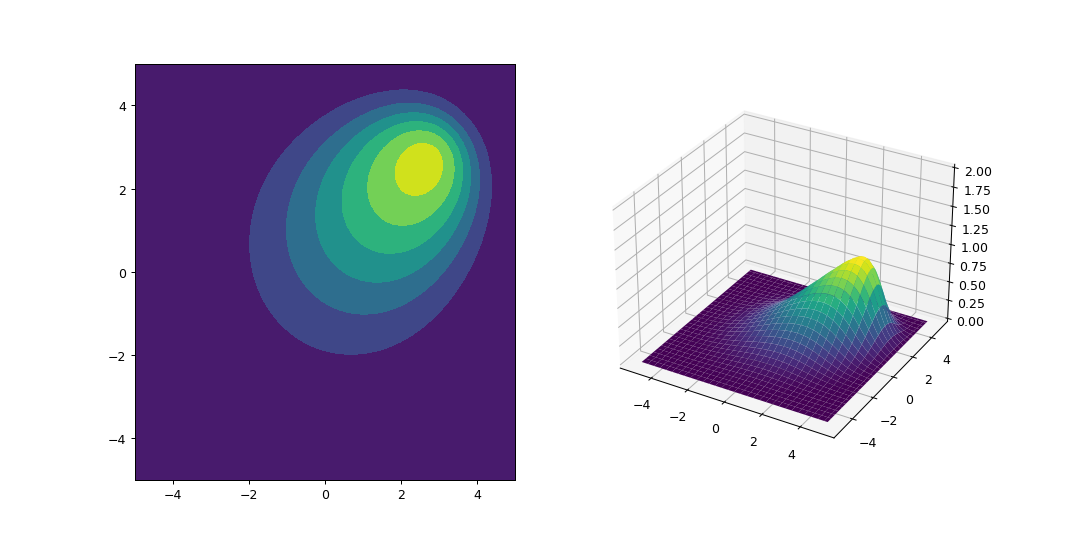

In [53]:
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121)
contorno = ax1.contourf(X, Y, u, cmap='viridis')

ax2 = fig.add_subplot(122, projection='3d')
superficie = ax2.plot_surface(X, Y, u, cmap='viridis')
ax2.set_zlim(0, 2)

def actualizar(frame):
    global u
    u = burgers_fd(u, dx, dy, dt, nu)
    ax1.clear()
    ax1.contourf(X, Y, u, cmap='viridis')
    ax2.clear()
    ax2.plot_surface(X, Y, u, cmap='viridis')
    ax2.set_zlim(0, 2)

ani = animation.FuncAnimation(fig, actualizar, frames=nt, interval=50)

plt.show()
